# 目次(Table of Contents)
### 1. バイアスとバリアンスについて説明せよ
### 2. Cross Validationについて説明せよ
### 3. sklearnのBoston house-pricesデータセットをloadして線形回帰を用いて学習せよ[(参考)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
### 4. 学習させた結果をsklearnのCross Validationで評価せよ[(参考)](https://tech.mof-mof.co.jp/blog/scikit-learn-cross-validation.html)
### ~~5. 学習結果の平均・分散を計算せよ[(参考)](http://tekenuko.hatenablog.com/entry/2016/09/19/151547)~~ 保留

# 1. バイアスとバリアンスについて
## MSE(Mean Square Error)の式からVarianceとBiasの式を導出する
### 母集団の真値: $t$，モデルの予測値: $y(x)$, 観測値（標本，真値＋ノイズ): $h(x)$
平均損失または期待損失は<br>
<br>$$\begin{align} E[L]=\int{\int{L(t,y(x))p(x,t)}}dxdt \tag{1}\end{align}$$<br>

で与えられる．回帰問題に良く使われる損失関数は二乗誤差$L(t,y(x))=\{y(x)-t\}^{2}$である．この場合，期待損失は

<br>$$\begin{align} E[L]=\int{\int{\{y(x)-t\}^{2} p(x,t)}}dxdt \tag{2}\end{align}$$<br>

と書ける．目標はE[L]を最小にするy(x)を選ぶことなので，この最適解を変分法を使って求めると

<br>$$\begin{align} \frac{\delta E[L]}{\delta y(x)}=2\int{\{y(x)-t\}p(x,t)dt=0} \tag{3}\end{align}$$<br>

また，確率の加法・乗法定理を使って式変形を行う<br>
・確率の加法定理 $P(X)=\sum_{Y}P(X,Y)$<br>
・確率の乗法定理 $P(X,Y)=P(Y|X)P(X)$<br>
<br>
(3)式より，<br>
$$
\begin{align}
\int{y(x)p(x,t)}dt=\int{tp(x,t)}dt\notag\\
y(x)\int{p(x,t)}dt=\int{tp(x,t)}dt\notag\\
y(x)p(x)dt=\int{tp(x,t)}dt\notag \\
y(x)=\frac{\int{tp(x,t)dt}}{p(x)}=\int{tp(t|x)dt}=E[t|x] \tag{4}
\end{align}
$$
<br>
となり，最適解$y(x)$は条件付き期待値になることが分かる．これは，$x$が与えられた下での$t$の条件付き平均であり，回帰関数と呼ばれる．<br>

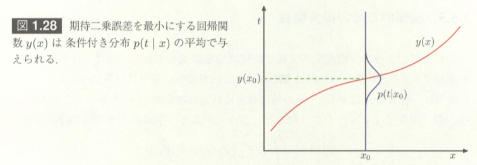

また，最適解$y(x)$が条件付き期待値なので，二乗の項を次のように展開することができる．<br>
$$
\begin{align}
\{y(x)-t\}^{2}&=\{y(x)-E[t|x]+E[t|x]-t\}^{2}\notag\\
              &=\{y(x)-E[t|x]\}^{2}+\{E[t|x]-t\}^2\notag\\
              &+2\{y(x)-E[t|x]\}\{E[t|x]-t\}\tag{5}
\end{align}
$$

(5)式を期待損失の(2)式に代入し，tで積分するとクロス項が消え次式になる<br>

$$
\begin{align}
E[L]&=\int\int\{y(x)-E[t|x]\}^2p(x,t)dxdt + \int\int\{E[t|x]-t\}^{2}p(x,t)dxdt\notag\\
&=\int\{y(x)-E[t|x]\}^2dx \int p(x,t)dt + \int\int\{E[t|x]-t\}^{2}p(t|x)p(x)dxdt\notag\\
&=\int\{y(x)-E[t|x]\}^2p(x)dx + \int\{E[t|x]-t\}^{2}p(t|x)dt\int p(x)dx\notag\\
&=\int\{y(x)-E[t|x]\}^2p(x)dx + \int var[t|x]p(x)dx\tag{6}\\
\end{align}
$$

$var[t|x]$は$x$が与えられた下での$t$の条件付き分散で，条件付き期待値と同様に<br>

$$\begin{align}var[t|x]=\int \{E[t|x]-t\}^{2}p(t|x)dt \end{align}$$<br>

で表される．(6)式で，求める関数$y(x)$は最初の項だけに入っており，$y(x)$が$E[t|x]$に等しいとき最小となり，この項は0になる．これは前に導いた，最適な最小二乗予測器は条件付き平均で与えられるという結果に他ならない．第2項は$t$の分散を$x$に関して平均したものである．これは目標データが本質的に持つ変動であり，ノイズとみなせる．これは$y(x)$とは独立なので，損失関数の中でそれ以上減らすことのできない損失関数の最小値となる．<br>

<br>ここで，(4)式の最適な予測である条件付き期待値を
$$
\begin{align}
h(x)=E[t|x]=\int tp(t|x)dt\notag
\end{align}
$$
と置く．<br>また，現実には有限個のデータ$D$しか与えられていないため，理想的な回帰関数$h(x)$を厳密に求めることはできない．頻度主義的立場では，推定値の不確実性を次のように評価する．まず，分布$p(t,x)$に従う多数のデータ集合に従う多数のデータ集合（標本数$N$で互いに独立とする）を考える．そして，与えられた任意のデータ集合$D$に対して学習アルゴリズムを実行でき，予測関数$y(x;D)$を求められると仮定する．このとき，異なるデータ集合は異なる関数を与えるため，二乗損失の値も異なる．このような設定のもと，学習アルゴリズムの性能は，データ集合の取り方に関する平均の意味で評価される．<br>
　ここで，(6)式の第一項の積分を考える．これは，あるデータ集合$D$に対して，<br>
 
 $$\{y(x;D) - h(x)\}^{2}\notag$$

という形になる．この量はデータ集合$D$に依存するため，この値のデータ集合の取り方に関する期待値を考える．上式の括弧内で$E_{D}[y(x;D)]$を足して引き，展開すると，<br>

$$
\begin{align}
\{y(x;D) - h(x)\}^{2}
=&\{y(x;D)-E_{D}[y(x;D)]+E_{D}[y(x;D)]-h(x)\}^{2}\notag\\
=& \{y(x;D)-E_{D}[y(x;D)]\}^{2}+\{E_{D}[y(x;D)]-h(x)\}^{2}\notag\\
&+2\{y(x;D)-E_{D}[y(x;D)]\}\{E_{D}[y(x;D)]-h(x)\}\tag{7}
\end{align}
$$

<br>が得られる．そして，この式全体のデータ集合$D$の取り方に関する期待値を取れば，最後の項は消える．<br>

$$
\begin{align}
E_{D}[2\{y(x;D)-E_{D}[y(x;D)]\}\{E_{D}[y(x;D)]-h(x)\}]
=&2\{E_{D}[y(x;D)]-h(x)\}E_{D}[y(x;D)-E_{D}[y(x;D)]]\notag\\
=&2\{E_{D}[y(x;D)]-h(x)\}E_{D}E_{D}[y(x;D)-E_{D}[y(x;D)]]\notag\\
=&2\{E_{D}[y(x;D)]-h(x)\}E_{D}E_{D}[y(x;D)]-E_{D}[y(x;D)]\notag\\
=&　0\notag\\
&(E[A]=A，E[E[A]]=E[A],\ when\ A\ is\ Constant)\notag
\end{align}
$$

<br>よって，

$$
\begin{align}
E_{D}[\{y(x;D) - h(x)\}^{2}]
= \{E_{D}[y(x;D)]-h(x)\}^{2}+E_{D}[\{y(x;D)-E_{D}[y(x;D)]\}^{2}]\tag{8}\\\\
\begin{cases}
Bias&=&E_{D}[y(x;D)]-h(x)\notag\\
Variance&=&E_{D}[\{y(x;D)-E_{D}[y(x;D)]\}^{2}]\notag\\
\end{cases}
\end{align}
$$

<br>となる．これより，$y(x;D)$と回帰関数$h(x)$の期待二乗誤差は2つの項の和で表されることが分かる．第一項は二乗バイアス(bias)と呼ばれ，すべてのデータ集合の取り方に関する予測値の平均が理想的な回帰関数からどのくらい離れているかを表している．第二項はバリアンス(variance)と呼ばれ，各データ集合に対する解が，特定のデータ集合の選び方に関する期待値周りでの変動の度合いを表している．したがって，第二項は関数$y(x;D)$の特定のデータ集合の選び方に関する敏感さを表している．

- バイアス(bias)とは、学習アルゴリズムの誤った仮定(設計)による誤差である。高いバイアスは、特徴量とターゲットの出力間の関連性を見逃す可能性がある(underfitting)
- バリアンス(variance)とは、トレーニングセットにおける小さなゆらぎ（変動）に対する感度から生じる誤差である。高いバリアンスは、アルゴリズムが意図した出力でなく、トレーニングデータのランダムノイズをモデル化する可能性がある(overfitting)<br>
[Bias–variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)のwikipediaを参考<br>

- underfitting…データの豊かさに対してモデルの自由度が小さすぎると、データの構造をとらえることが全くできない。つまり訓練誤差の値が大きすぎて、何の予測能力も得られないこと。未学習(under learning)とも呼ばれる
- overfitting…モデルの自由度が大きすぎると、学習データのもつノイズ（統計的なゆらぎ）までも正確にフィッティングしてしまい、与えれた訓練データに関する訓練誤差の値はどんどん小さくなる。しかし、訓練データに適合することで未知のデータに対してどんどん予測能力を失っていく。

Q. 最小二乗法という考え方でも，等分散ガウス分布＋最尤推定法という考え方でも「二乗損失関数$\sum_{i}{(y_{i}-f(x_{i}))^{2}}$を最小にするような$f(x_{i})$を選べ」という同じ結果が得られることについて[(参考)](https://mathwords.net/saisyonijoho)<br>
A. 最小二乗法というのは最適化手法の一つに過ぎず他の手法よりも優れていると証明できないが，データ(のノイズ)が等分散ガウス分布に従っていると仮定できるときは最小二乗法は最尤推定と同じ結果になるので，最小二乗法の正当性が示される.<br>

参考文献
- PRML(上)<br>
- これならわかる深層学習（入門）<br>
- PRMLの内容を分かりやすく説明している[サイト](https://www.hellocybernetics.tech/entry/2017/01/24/100415)<br>
- バイアスとバリアンスについて参考にした[サイト](https://nigimitama.hatenablog.jp/entry/2018/11/24/062732)<br>

# 2. Cross Validation(交差検証)について
[交差検証のWikipedia](https://ja.wikipedia.org/wiki/%E4%BA%A4%E5%B7%AE%E6%A4%9C%E8%A8%BC)を参考
- 交差検証とは、統計学において標本データを分割し、その一部をまず解析して、残る部分でその解析のテストを行い、解析自身の妥当性の検証・確認に充てる手法を指す。データの解析がどれだけ本当に母集団に対処できるかを良い近似で検証・確認するための手法である。つまり、交差検証によってデータの分割によらない頑強な汎化精度の評価が可能になる。また、データセットを学習データとテストデータに分けた場合、テストデータを使わずに汎化性能が高いかどうか調べることができるのも特徴である。
- 交差検証の主な種類<br>
・ホールドアウト検証・・・初期標本群から事例を無作為に選択しテスト事例を形成し、残る事例を訓練事例とする。ただし、データを交差させないため、交差検証には分類されない<br>
・K-分割交差検証(K-fold cross-validation)・・・標本群をK個に分割し、そのうちの1つをテスト事例とし、残るK-1個を訓練事例とするのが一般的である。交差検証は、K個に分割された標本群それぞれをテスト事例としてk回検証を行う。そして、k個の精度の平均値をモデルの評価値とする<br>
・leave-one-out 交差検証(LOOCV，1個抜き検証)・・・標本群から1つの事例だけを抜き出してテスト事例とし、残りを訓練事例とする。これを全事例が1回ずつテスト事例となるよう検証を繰り返す。これはK-分割交差検証のKを標本サイズにした場合と同じである。ただし、LOCCVにはカーネル回帰やティホノフ正則化などと関連がある。

# 3. sklearnのBoston house-pricesデータセットをloadして線形回帰を行う

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
                                    boston.data, boston.target,
                                    test_size=0.2, random_state=0)
print('X_train.shape: {}, X_test.shape: {}'.format(X_train.shape, X_test.shape))
print('y_train.shape: {}, y_test.shape: {}'.format(y_train.shape, y_test.shape))

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Variance score(R^2 score): %.2f' % r2_score(y_test, y_pred))

X_train.shape: (404, 13), X_test.shape: (102, 13)
y_train.shape: (404,), y_test.shape: (102,)
Coefficients: 
 [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
Mean squared error: 33.45
Variance score(R^2 score): 0.59


https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation


# 4. 学習させた結果をsklearnのCross Validationで評価せよ
[sklearnのmodelの評価方法(scoring)](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)<br>
[jupyter notebookの数式表記方法](https://qiita.com/namoshika/items/63db972bfd1030f8264a)<br>
[CrossValidation + GridSearchCV](https://qiita.com/tomov3/items/039d4271ed30490edf7b)

In [22]:
# 最新のsklearnではcross_validationが存在しない？？？
#from sklearn import cross_validation
import numpy as np
np.set_printoptions(precision=3)
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# ボストンの家の部屋数と、家の価格データ（詳しくは公式参照）
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
boston = datasets.load_boston()

# sklearn.model_selection.train_test_splitを使うと簡単にトレーニングデータとテストデータを分割出来る
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.4, random_state=0) # random_stateはrandom seedのこと、指定しなかったらrandomな変数になる
print(boston.data.shape, X_train.shape, X_test.shape)

# 学習
regr = linear_model.LinearRegression()

# regr.score: 決定係数を出力。予測値xと正解値yの相関を測る
# あるパラメータにおけるcv回の平均スコア（R^2)
# ただし、線形回帰はパラメータがないためCross Validationで最適なパラメータを探す必要がないためあまり意味はない？
scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
print('scores: {}'.format(scores))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(506, 13) (303, 13) (203, 13)
scores: [0.593 0.744 0.552 0.794 0.775]
Accuracy: 0.69 (+/- 0.20)


数値的にモデルの性能を評価する指標の例に、平均二乗誤差(Mean Squared Error: MSE)や決定係数($R^2$)がある<br>
$MSE=\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-y^{(i)}_{pred})^2$<br>
$R^{2}=1-\frac{MSE}{Var(y)}$<br>
$R^{2}$スコアは負～1.0の値を取るので、0.69はそこそこできていると感じた

# ~~5. 学習結果の平均・分散を計算せよ~~
[Plotting Validation Curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py)<br>

In [17]:
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
print('regr: {}'.format(regr.coef_))
print('pred_mean: {}, pred_var: {}'.format(np.mean(pred), np.var(pred)))
print('true_mean: {}, true_var: {}'.format(np.mean(y_test), np.var(y_test)))

regr: [-1.037e-01  5.586e-02  5.882e-02  2.505e+00 -1.903e+01  3.254e+00
 -3.222e-03 -1.576e+00  2.587e-01 -1.147e-02 -1.108e+00  5.501e-03
 -5.596e-01]
pred_mean: 22.096720823737087, pred_var: 60.40325264082388
true_mean: 22.213793103448275, true_var: 82.73054866655343
